The goal now is to perform EDA on the waze dataset. I will add some relevant visualizations that will help communicate the story that the data tells.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/Users/tasfi/Desktop/codes/python/projects/Waze/waze_dataset.csv')

In [5]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [7]:
df.size

194987

In [8]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


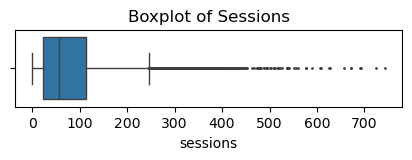

In [9]:
# creating a boxplot to find outliers and distribution of sessions

plt.figure(figsize=(5, 1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('Boxplot of Sessions');

Text(0.5, 1.0, 'seesions histogram')

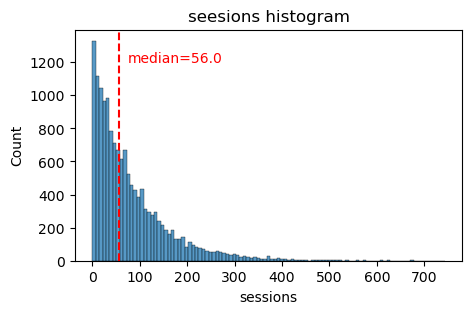

In [10]:
# histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color = 'red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('seesions histogram')

This is a right skewed histogram with over half the users having less than 56 sessions in the past month. 

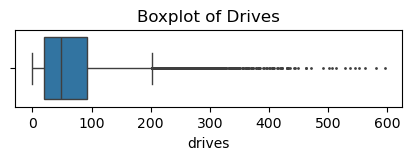

In [11]:
# box plot for drives (an occurance of driving at least 1 km during the month)
plt.figure(figsize=(5, 1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('Boxplot of Drives');

Text(0.5, 1.0, 'drives histogram')

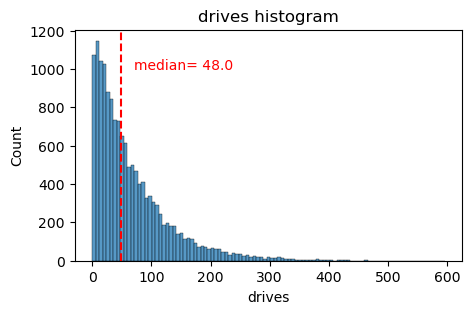

In [12]:
# histogram of the drives 
plt.figure(figsize=(5,3))
sns.histplot(x=df['drives'])
median = df['drives'].median()
plt.axvline(median, color = 'red', linestyle='--')
plt.text(70,1000, 'median= 48.0', color='red')
plt.title('drives histogram')

The drives information follows a similar distribution tot hesessions variable. It is right-skewed, approximately log-nirmal, with a median of 48. However, some drivers had over 400 drives.

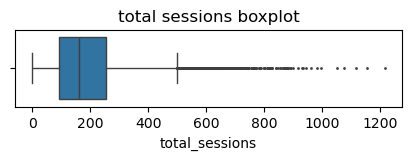

In [13]:
# a box plot of the number of sessions since aa user has onboarded the app
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total sessions boxplot');

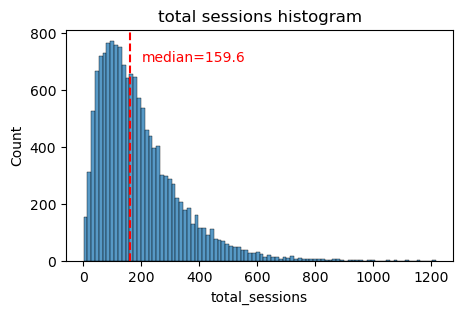

In [14]:
# histogram of the total sessions
plt.figure(figsize=(5,3))
sns.histplot(x=df['total_sessions'])
median = df['total_sessions'].median()
plt.axvline(median, color = 'red', linestyle='dashed')
plt.text(200,700, 'median=159.6', color='red')
plt.title('total sessions histogram');

The total_sessions is a right skewed distributions. The median total number of sessions in 159.6. This is interesting information because if the median number of sessions in the past month is 56 and total number of sessions is 156 that indicates a large proportion of a user's total drives have taken place in the last month. 

Text(0.5, 1.0, 'n_days_after_onboarding boxplot')

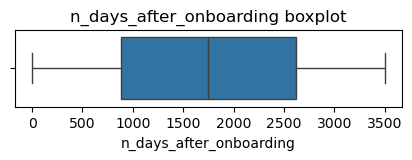

In [15]:
# n_days_after_onboarding
# a box plot of the number of days since a user has onboarded the app  

plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding boxplot')


Text(0.5, 1.0, 'n_days_after_onboarding histogram')

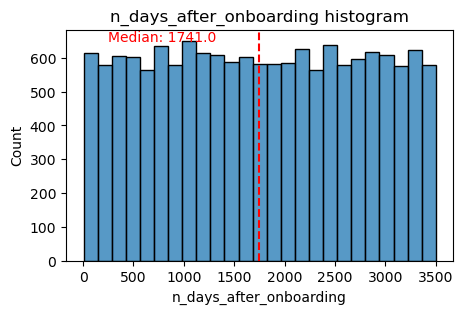

In [16]:
# histogram of n_days_after_onboarding
plt.figure(figsize=(5,3))
sns.histplot(x=df['n_days_after_onboarding'])
median = df['n_days_after_onboarding'].median()
plt.axvline(median, color = 'red', linestyle='--')
plt.text(250, 650, f'Median: {median}', color='red')
plt.title('n_days_after_onboarding histogram')

The total user tenure is a uniform distribution with values ranging from near 0 to ~3,500.

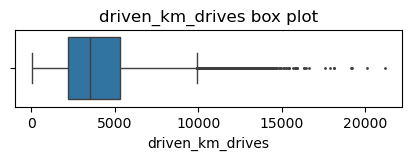

In [17]:
# driven_km_drives (total km driven during the month)

plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives box plot');

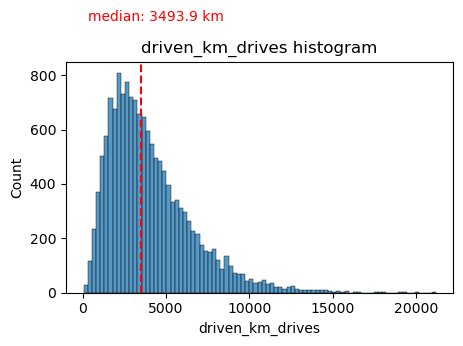

In [18]:
#histogram of driven km_drives
plt.figure(figsize=(5,3))
sns.histplot(x=df['driven_km_drives'])
median = df['driven_km_drives'].round(1).median()
plt.axvline(median, color = 'red', linestyle='--')
plt.text(300, 1000, f'median: {median} km', color='red')
plt.title('driven_km_drives histogram');


The number of drives driven in the last month per user is a right-skewed distribution with half of the users driving under 3,495 km. Some drivers drove over 20,000 km which is a lot. This tells us that most drivers from this dataset are not normal drivers. They are most likely truck drivers. This is something we should keep in mind for future references

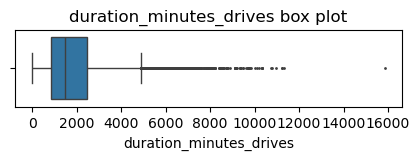

In [19]:
# total duration driven in minutes
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot');

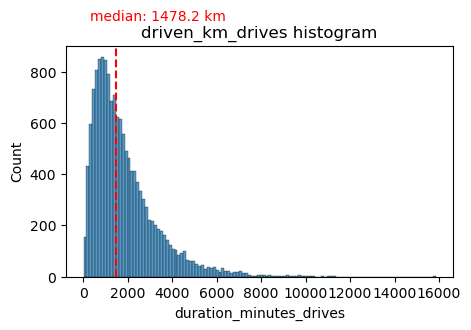

In [20]:
plt.figure(figsize=(5,3))
sns.histplot(x=df['duration_minutes_drives'])
median = df['duration_minutes_drives'].round(1).median()
plt.axvline(median, color = 'red', linestyle='--')
plt.text(300, 1000, f'median: {median} km', color='red')
plt.title('driven_km_drives histogram');

The duration_km_driven is heavily right-skewed tail. Jalf of the users have driven less ghan 1478 minutes in last 30 days. Some users clocked over 250 hours.

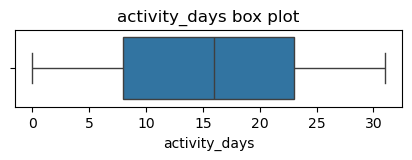

In [22]:
# activity days
# number of days the user opens the app during the month

plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('activity_days box plot');


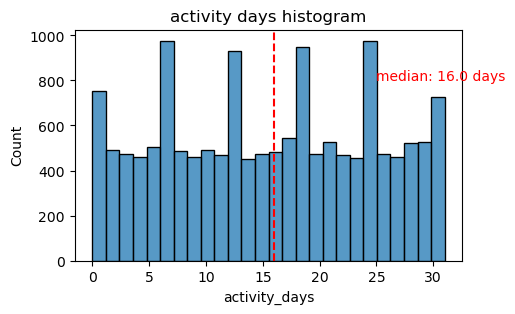

In [36]:
#histogram of activity days
plt.figure(figsize=(5,3))
sns.histplot(x=df['activity_days'])
median = df['activity_days'].round(1).median()
plt.axvline(median, color = 'red', linestyle='--')
plt.text(25, 800, f'median: {median} days', color='red')
plt.title('activity days histogram');

The median number of times a user has opened the app within the last month is 16. The box plot shows a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of the days. However, there are ~750 people who never opened the app and ~750 people who opened the app every single day of the month.

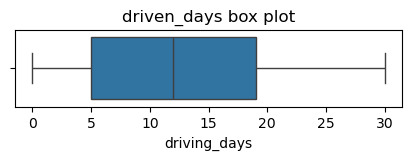

In [38]:
#box plot of numbr of days a user drove at least 1 km during last month.

plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driven_days box plot');

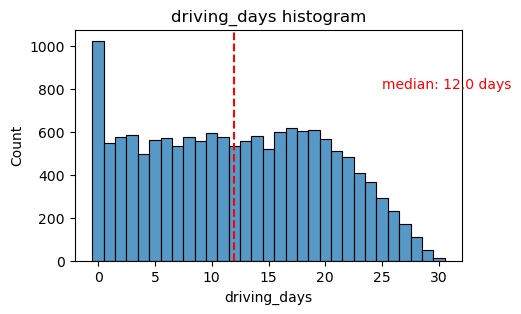

In [45]:
#histogram of driving days
plt.figure(figsize=(5,3))
sns.histplot(x=df['driving_days'], discrete=True)
median = df['driving_days'].round(1).median()
plt.axvline(median, color = 'red', linestyle='--')
plt.text(25, 800, f'median: {median} days', color='red')
plt.title('driving_days histogram');

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the drivivng days distrivution tails off on the right, however the driving daays distribution tails off on the right.

However, there were almost twice as many users ~1000 vs ~550 who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

Text(0.5, 1.0, 'Users by device')

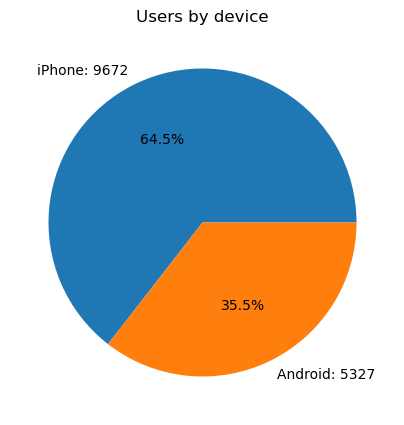

In [46]:
# device pie chart
# the type of device users used 

fig = plt.figure(figsize=(5,5))
data = df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
                autopct='%1.1f%%'
                )
plt.title('Users by device')

There are nearly twice as many iPhone users than Android users in this data.

In [ ]:
# label 

Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

Since this is a categorical variable, we should lot a pie chart instead.

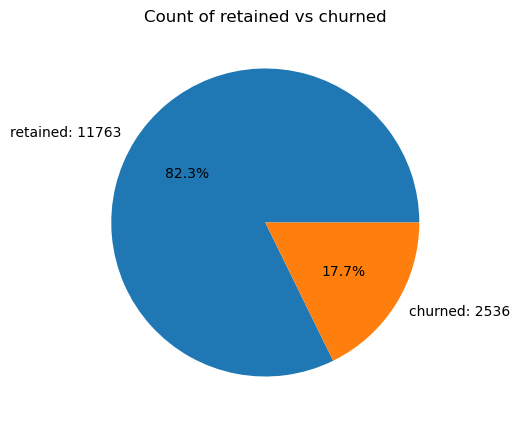

In [53]:
# Pie chart

fig = plt.figure(figsize=(5,5))
data = df['label'].value_counts()
labels = labels = [f'{label}: {status}' for label, status in zip(data.index, data.values)]

plt.pie(data,
        labels=labels,
        autopct='%1.1f%%')
plt.title('Count of retained vs churned');


Less than 18% of the users have churned

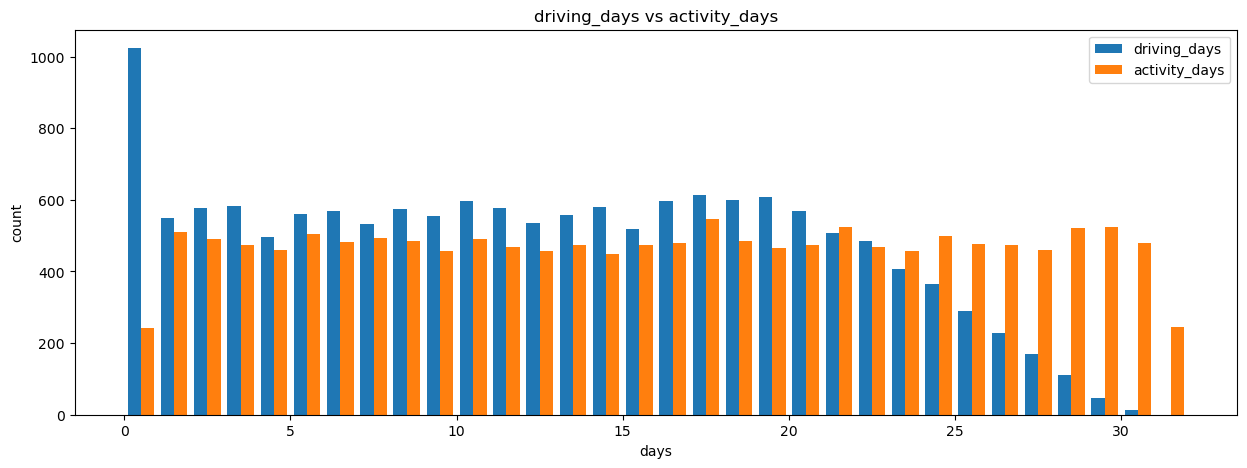

In [59]:
# driving_days and activity_days are closely related
# we can plot them together to see the relationship between the two variables
plt.figure(figsize=(15,5))
label=['driving_days', 'activity_days']
plt.hist([df['driving_days'], df['activity_days']],
         bins = range(0, 33),
         label=label) 
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs activity_days');


As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive; perhaps to check drive times or route information, to update settings, or even just by mistake.

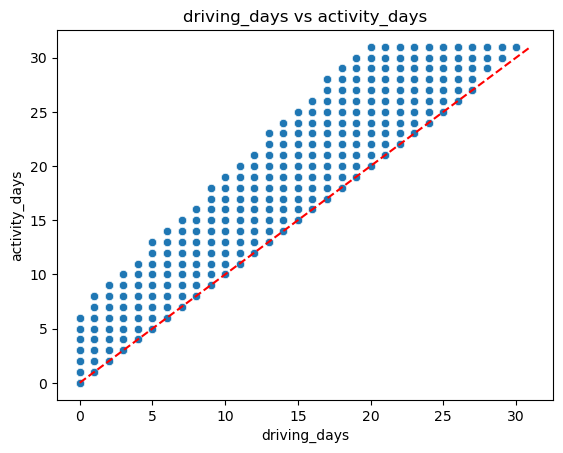

In [61]:
# scatter plot of activivty days vs drving days
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs activity_days')
plt.plot([0,31], [0,31], color ='red', linestyle='--');

If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

Text(0.5, 1.0, 'Retention by device histogram')

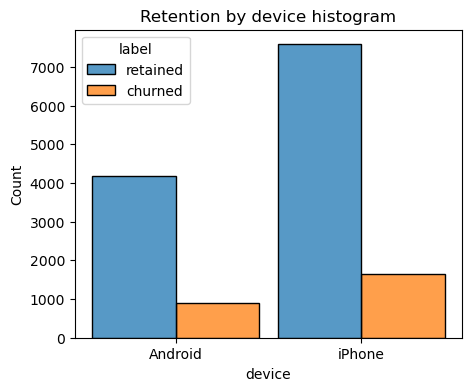

In [63]:
# Retention by device
# histogram 
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram')

In the 'Data Exploration' project we found that the median distance driven by users who churned was ~697.54 km, vs ~289.55 km for people who did not churn. Let's explore this further.

In [79]:
df['kilometer_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['kilometer_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: kilometer_per_driving_day, dtype: float64

The mean value is infinity, the standard deviation is NaN, and the max value is infinity.This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined. We can fix this by:1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.
1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [72]:
# convert infinite values to zero
df.loc[df['kilometer_per_driving_day'] == np.inf, 'kilometer_per_driving_day'] = 0
df['kilometer_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: kilometer_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

We can plot a histogram where the max kilometers driven/day is 1200km.

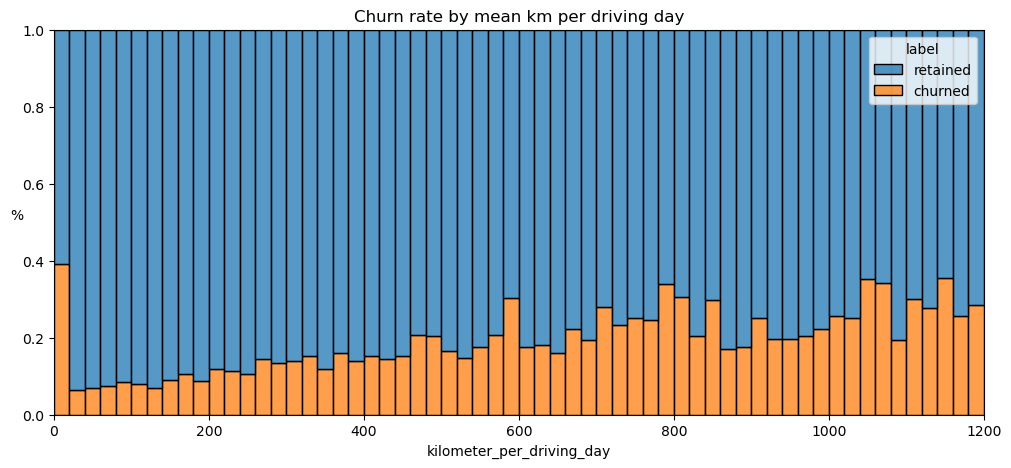

In [77]:
# histogram of km_per_drivng_day

plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='kilometer_per_driving_day',
             bins=range(0,1201, 20),
             hue='label',
             multiple='fill'
             )
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

Let's create another histogram that represents the churn rate for each number of driving days.

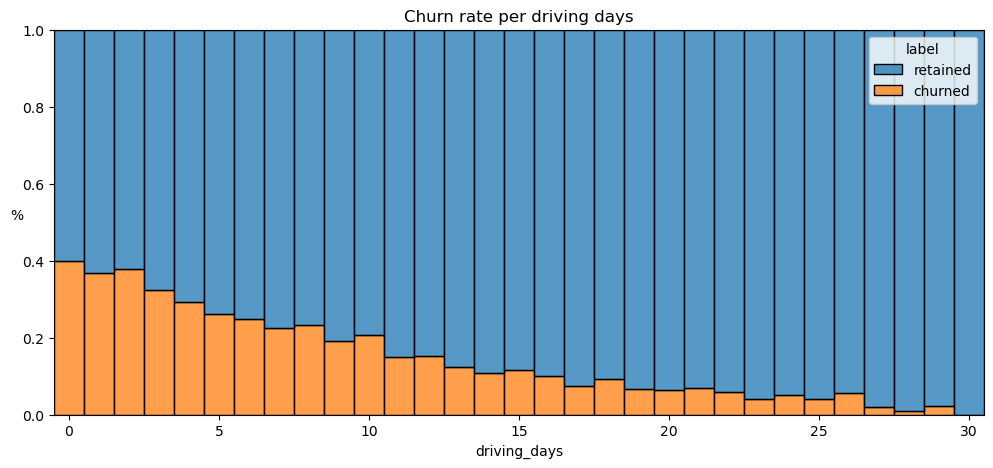

In [88]:
# histogram 

plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(0,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving days');

People who drove more days churned less. While 40% of the users who did not drive a single day churned, no one who used the app all 30 days churned. This is a good indication of customer satisfaction.  
When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

PERCENT SESSIONS: Represents the percentage of each user's total sessions that were logged in their last month of use.

In [91]:
df['percent_sessions_in_last_month'] = df['sessions'] /df['total_sessions']
df['percent_sessions_in_last_month'].median()

0.42309702992763176

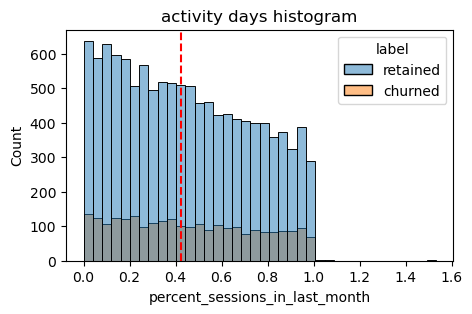

In [109]:
# histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['percent_sessions_in_last_month'], hue=df['label'], multiple='layer')
median = df['percent_sessions_in_last_month'].median()
plt.axvline(median, color = 'red', linestyle='--')

plt.title('activity days histogram');


In [110]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

We can make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

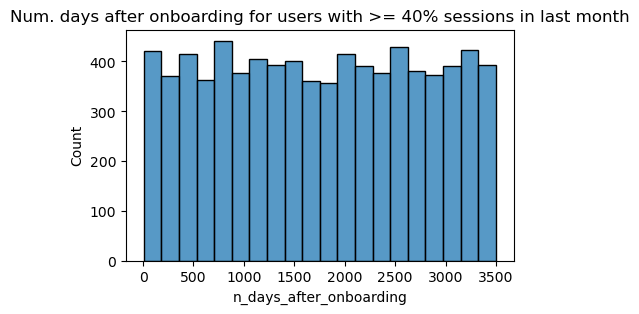

In [111]:
# histogram for people who drove 40% or more of 
# their total drive in the last month

data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >= 40% sessions in last month');
             

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

It may be useful to impute the outlying data with more reasonable values. One way of doing that is by setting a threshold on a percentile of the distribution. 

We can write a function that calculates the 95th percentile of the distribution.

In [114]:
def outlier_imputer(column_name, percentile):
    #calculate threshold
    threshold = df[column_name].quantile(percentile)
    # impute threshold for values > thean thereshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

In [115]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [116]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,kilometer_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,inf,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,NaN,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,3.022063e+00,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,1.672804e+02,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,3.231459e+02,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,7.579257e+02,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,inf,1.530637


EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.


* There is missing data in the user churn label, so we might need  further data processing before further analysis.
* There are many outlying observations for drives, so we might consider a variable transformation to stabilize the variation.
* The number of drives and the number of sessions are both strongly correlated, so they might provide redundant information when we incorporate both in a model.
* On average, retained users have fewer drives than churned users.

My other questions are ....

* How does the missingness in the user churn label arise?
* Who are the users with an extremely large number of drives? Are they ridesharing drivers or commercial drivers?
* Why do retained users have fewer drives than churned users? Is it because churned users have a longer history of using the Waze app?
* What is the user demographic for retained users and churned users?

My client would likely want to know ...

* What are the key variables associated with user churn?
* Can we implement policies to reduce user churn?




1. What types of distributions did you notice in the variables? What did this tell you about the data?

> *Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.*

2. Was there anything that led you to believe the data was erroneous or problematic in any way?

> *Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as `driven_km_drives`. Some of the monthly variables also might be problematic, such as `activity_days` and `driving_days`, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.*

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

> *Yes. I'd want to ask the Waze data team to confirm that the monthly variables were collected during the same month, given the fact that some have max values of 30 days while others have 31 days. I'd also want to learn why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?*

4. What percentage of users churned and what percentage were retained?

> *Less than 18% of users churned, and \~82% were retained.*

5. What factors correlated with user churn? How?

> *Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.*

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?

> *No. Users of all tenures from brand new to \~10 years were relatively evenly represented in the data. This is borne out by the histogram for `n_days_after_onboarding`, which reveals a uniform distribution for this variable.*